In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Admin\resources\GDPList.csv',encoding = 'ISO-8859-1')
data.head()

Country      Continent  GDP (millions of US$)
0   Afghanistan           Asia                  18181
1       Albania         Europe                  12847
2       Algeria         Africa                 190709
3        Angola         Africa                 100948
4     Argentina  South America                 447644

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [3]:
#Bộ dữ liệu chứa 125 dòng dữ liệu và 3 cột
#Country, Continent: là thuộc tính định tính, có thang đo định danh
#GDP: thuộc tính định lượng, thang đo ratio 

In [104]:
#Việt hóa tên các cột trong bảng dữ liệu: Country 🡪 Nuoc; Continent 🡪 Chauluc; GDP (millions of US$) 🡪 GDP (trieu do)
data.rename(columns={'Country':'Nuoc','Continent':'Chauluc','GDP (millions of US$)':'GDP_trieu_do'},inplace=True)
data.head()

Nuoc        Chauluc  GDP_trieu_do
0   Afghanistan           Asia         18181
1       Albania         Europe         12847
2       Algeria         Africa        190709
3        Angola         Africa        100948
4     Argentina  South America        447644

In [105]:
#Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc” 
data.insert(1,'Thanhpho',data.loc[:,'Nuoc'])
data.head()

Nuoc      Thanhpho        Chauluc  GDP_trieu_do
0   Afghanistan   Afghanistan           Asia         18181
1       Albania       Albania         Europe         12847
2       Algeria       Algeria         Africa        190709
3        Angola        Angola         Africa        100948
4     Argentina     Argentina  South America        447644

In [106]:
#Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi
data['Thanhpho'].replace(' Vietnam','Hanoi',inplace = True)
data

Nuoc      Thanhpho        Chauluc  GDP_trieu_do
0     Afghanistan   Afghanistan           Asia         18181
1         Albania       Albania         Europe         12847
2         Algeria       Algeria         Africa        190709
3          Angola        Angola         Africa        100948
4       Argentina     Argentina  South America        447644
..            ...           ...            ...           ...
120    Uzbekistan    Uzbekistan           Asia         45353
121     Venezuela     Venezuela  South America        315841
122       Vietnam         Hanoi           Asia        122722
123         Yemen         Yemen         Africa         33675
124        Zambia        Zambia         Africa         19206

[125 rows x 4 columns]

In [107]:
#Xóa các bản ghi có Chauluc là ‘Asia’
#Dùng phương thức drop xóa các dòng, với tham số đầu tiên chỉ số của các dòng được xác định bởi phương thức loc: df.loc[df.ChauLuc == ‘Asia’].index
data.drop(data.loc[data.Chauluc == 'Asia'].index, axis = 0, inplace=True)
data

Nuoc        Thanhpho        Chauluc  GDP_trieu_do
1           Albania         Albania         Europe         12847
2           Algeria         Algeria         Africa        190709
3            Angola          Angola         Africa        100948
4         Argentina       Argentina  South America        447644
5         Australia       Australia        Oceania       1488221
..              ...             ...            ...           ...
118   United States   United States  North America      15094025
119         Uruguay         Uruguay  South America         46872
121       Venezuela       Venezuela  South America        315841
123           Yemen           Yemen         Africa         33675
124          Zambia          Zambia         Africa         19206

[89 rows x 4 columns]

In [109]:
#Xóa các bản ghi có GDP < 300000
data.drop(data.loc[data.GDP_trieu_do < 300000].index, axis = 0, inplace=True)
data

Nuoc         Thanhpho        Chauluc  GDP_trieu_do
4          Argentina        Argentina  South America        447644
5          Australia        Australia        Oceania       1488221
6            Austria          Austria         Europe        419243
11           Belgium          Belgium         Europe        513396
15            Brazil           Brazil  South America       2492908
21            Canada           Canada  North America       1736869
24          Colombia         Colombia  South America        328422
32           Denmark          Denmark         Europe        333238
41            France           France         Europe       2776324
44           Germany          Germany         Europe       3577031
46            Greece           Greece         Europe        303065
58             Italy            Italy         Europe       2198730
73            Mexico           Mexico  North America       1154784
78       Netherlands      Netherlands         Europe        840433
81            Norway           Norway         Europe        483650
89            Poland           Poland         Europe        513821
100     South Africa     South Africa         Africa        408074
102            Spain            Spain         Europe       1493513
105           Sweden           Sweden         Europe        538237
106      Switzerland      Switzerland         Europe        636059
117   United Kingdom   United Kingdom         Europe       2417570
118    United States    United States  North America      15094025
121        Venezuela        Venezuela  South America        315841

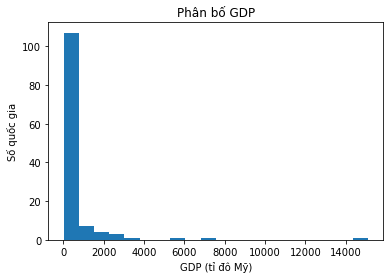

In [15]:
plt.hist(data['GDP (millions of US$)']/1000, bins = 20)
plt.title("Phân bố GDP")
plt.xlabel('GDP (tỉ đô Mỹ)')
plt.ylabel('Số quốc gia')
plt.show()

In [26]:
country = data.Country.unique()
print('Số lượng các quốc gia: ' + str(country.size))

Số lượng các quốc gia: 125


In [27]:
#Hơn 80% các quốc gia có GDP <1000 tỷ đô Mỹ 

In [28]:
#Mỗi châu lục có bao nhiêu quốc gia
data.groupby('Continent')['Country'].count()

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
South America     9
Name: Country, dtype: int64

In [29]:
#Tổng GDP các châu lục
data.groupby('Continent')['GDP (millions of US$)'].sum()

Continent
Africa            1820811
Asia             24425891
Europe           19139380
North America    18238447
Oceania           1662727
South America     4141217
Name: GDP (millions of US$), dtype: int64

In [30]:
#Top 10 quốc gia doanh thu lớn nhất
GDP_country = data.groupby(['Country'])['GDP (millions of US$)'].sum().sort_values(ascending= False)
GDP_country.head(10)

Country
 United States     15094025
 China              7298147
 Japan              5869471
 Germany            3577031
 France             2776324
 Brazil             2492908
 United Kingdom     2417570
 Italy              2198730
 Russia             1850401
 Canada             1736869
Name: GDP (millions of US$), dtype: int64

In [8]:
#Tính giá trị lớn nhất và nhỏ nhất của GDP
print('Giá trị GDP nhỏ nhất là ',data['GDP (millions of US$)'].min())
print('Giá trị GDP lớn nhất là ',data['GDP (millions of US$)'].max())

Giá trị GDP nhỏ nhất là  10600
Giá trị GDP lớn nhất là  15094025


In [9]:
#châu lục nào xuất hiện nhiều nhất
data['Continent'].mode()

0    Europe
Name: Continent, dtype: object

In [17]:
#Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.
data.pivot_table(values='GDP (millions of US$)', index='Continent',aggfunc={sum,'mean'})

mean       sum
Continent                            
Africa         6.278659e+04   1820811
Asia           6.784970e+05  24425891
Europe         5.172805e+05  19139380
North America  1.658041e+06  18238447
Oceania        5.542423e+05   1662727
South America  4.601352e+05   4141217